## Mini-Projet Apprentissage Supervisé

Réalisé par **Yanis AIT HAMMOU**, 

N° étudiant: **21910813**

**Objectif:**
L'objectif du projet est de classer les courriers indésirables en mettant en pratique les concepts vus en classe, notamment les modèles de régression linéaire, les k plus proches voisins et le classifieur bayésien naïf..
<img src="https://miro.medium.com/max/2554/1*Fm58r_RQ53sEHfwFa28LpA.png">


## 1.Importation des bibliothèques

In [ ]:
# Manipulation des dataframe et des tableaux
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# lire des fichier à partir des liens 
import requests

# évaluation
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, learning_curve, GridSearchCV
from sklearn.metrics import precision_recall_curve, recall_score

# modèles
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression


## 2.Importation des données
Dans cette analyse je vais utiliser les données de la base spambase qui se trouve en suivant ce lien: https://archive.ics.uci.edu/ml/datasets/spambase
c'est la meme base qui se trouve dans le package **kernlab** de R

In [ ]:
# Liens vers les données
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
url_names = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names"
url_doc = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.DOCUMENTATION"


# Importer des données à partir de liens
data_doc = requests.get(url_doc).text
data_names = requests.get(url_names).text
data = pd.read_csv(url, header=None)

# Afficher la documentations des données
#print(data_doc)
#print(data_names)

# Afficher les 5 premieres ligne du jeu de données
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## 3.Analyse exlploratoire des données

In [ ]:
# Afficher la taille du jeu de données
print(f"La taille du jeu de données:\n\tcolonnes : {data.shape[1]}\n\tlignes   : {data.shape[0]}\n")

# Afficher le nombre de valeurs manquantes
print(f"Le nombre de valeurs manquantes: {data.isnull().sum().sum()}\n")

# Afficher la distribution du nombre d'observations par classe
print(f"La distribution du nombre d'observation par classe:\n\tclasse 0 : {(data.iloc[:, -1] == 0).sum()}\n\tclasse 1 : {(data.iloc[:, -1] == 1).sum()}")

# Afficher la description des variables
data.describe()

La taille du jeu de données:
	colonnes : 58
	lignes   : 4601

Le nombre de valeurs manquantes: 0

La distribution du nombre d'observation par classe:
	classe 0 : 2788
	classe 1 : 1813


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.800000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,2.640000,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,0.000000,0.000000,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3

### 3.1.Analyse statistique univariée 

In [ ]:
# Convertir les noms de colonnes en chaîne de caracteres
data.columns = [str(col) for col in range(data.shape[1])]

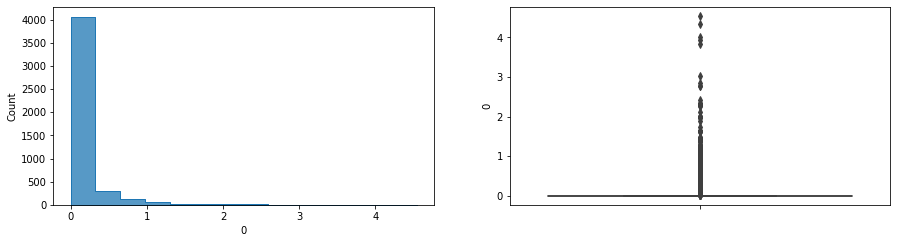

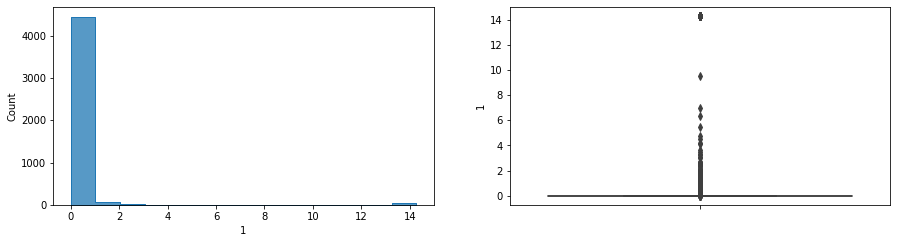

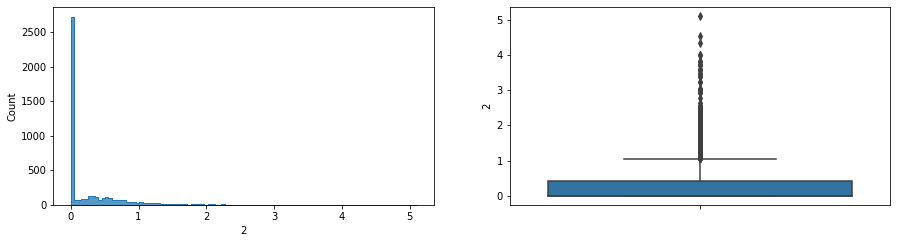

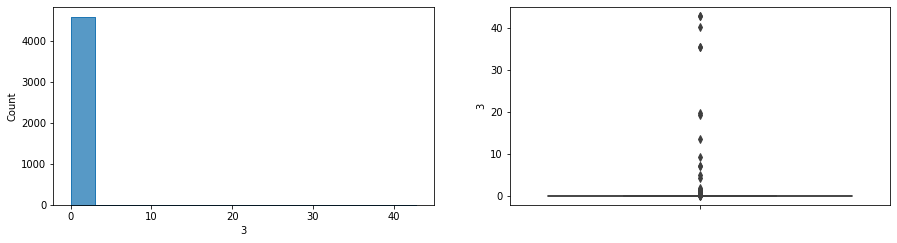

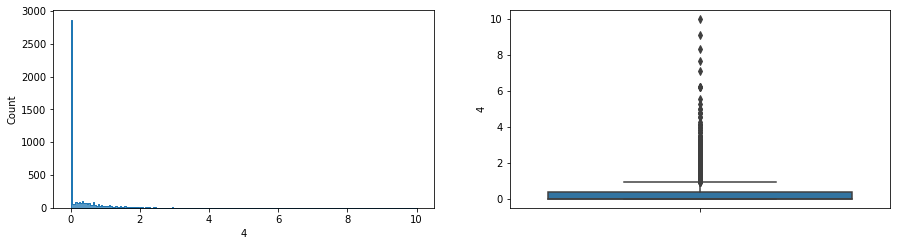

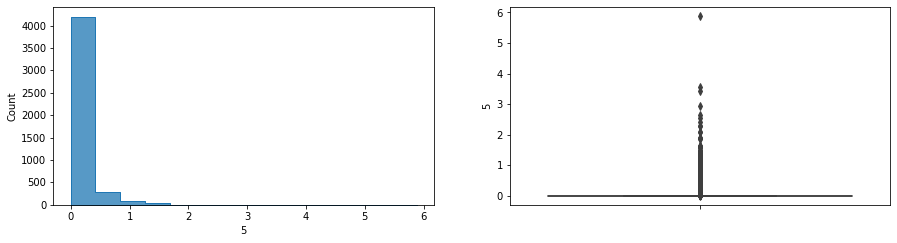

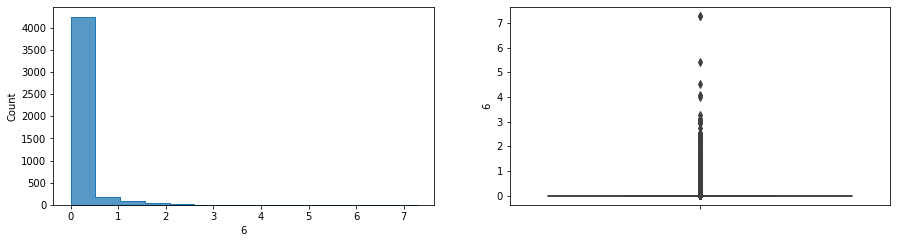

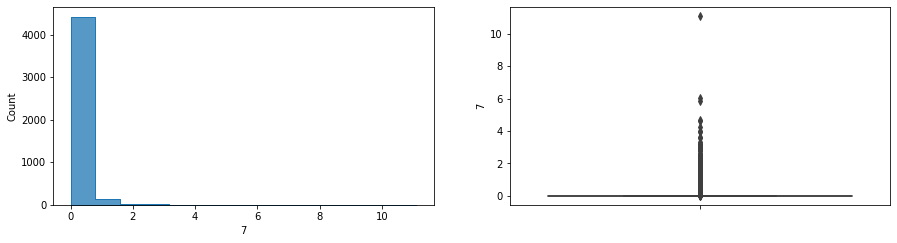

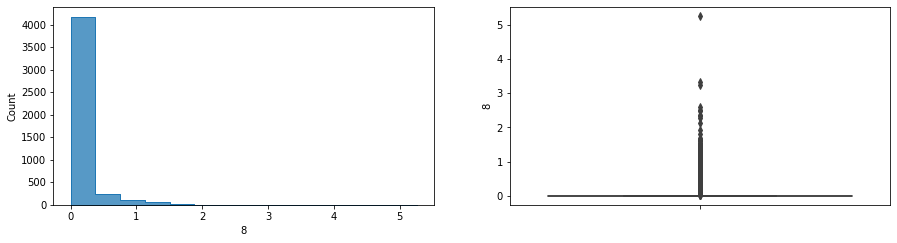

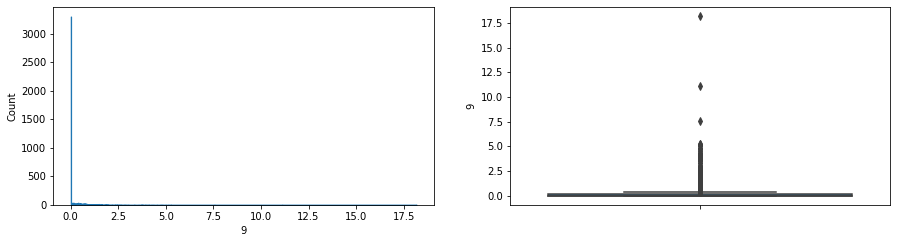

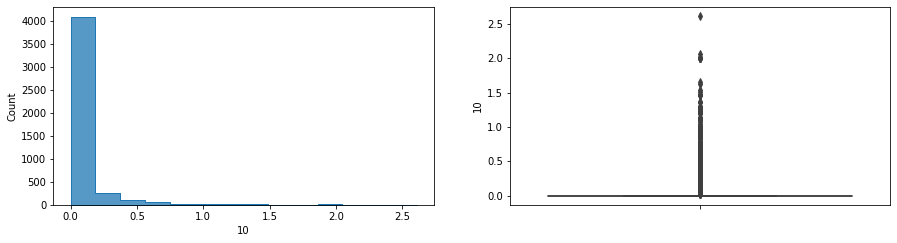

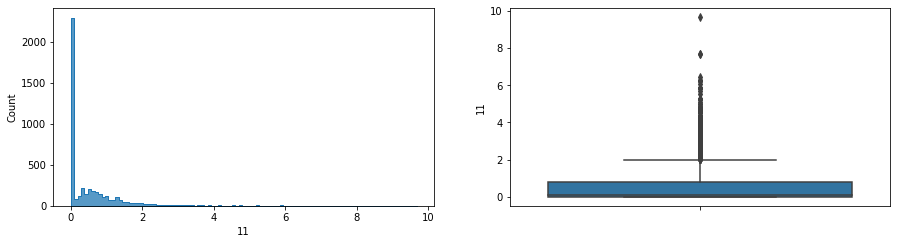

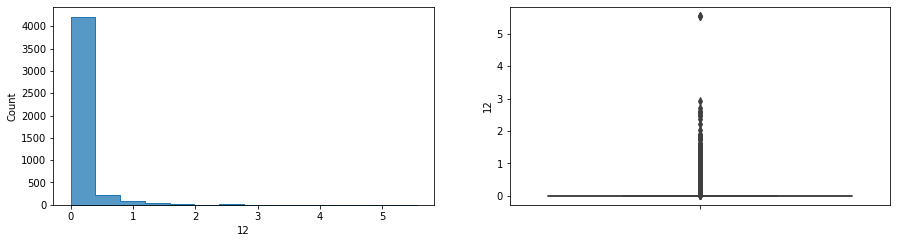

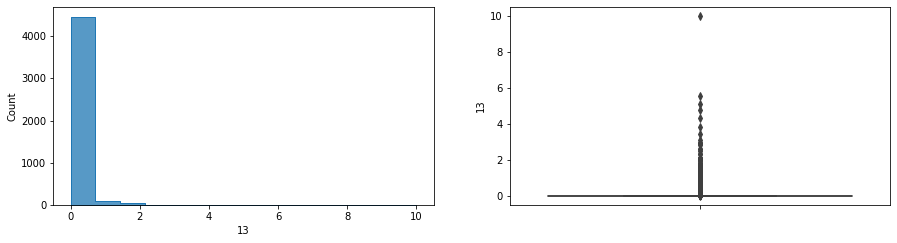

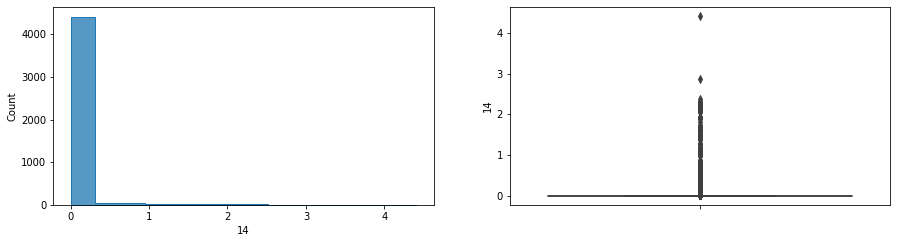

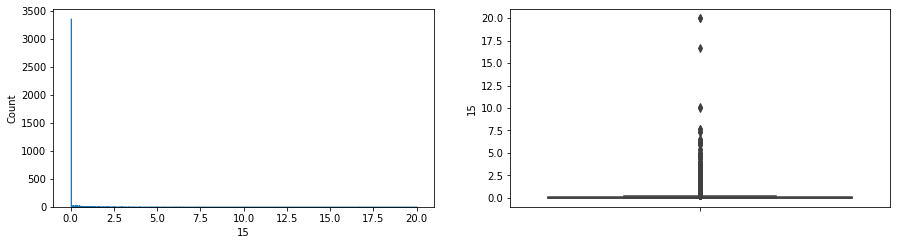

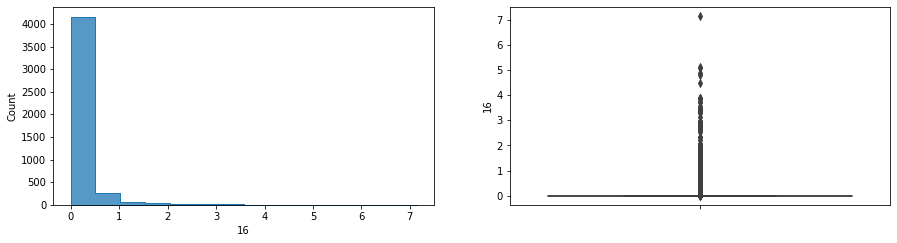

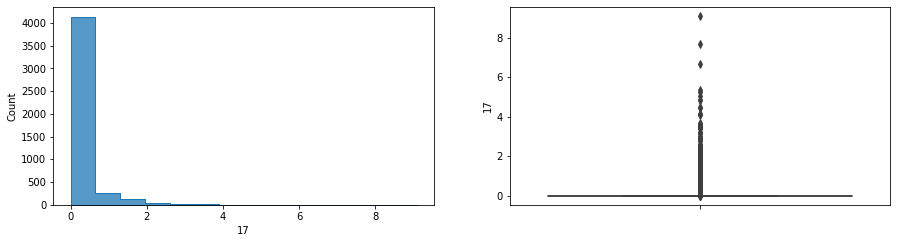

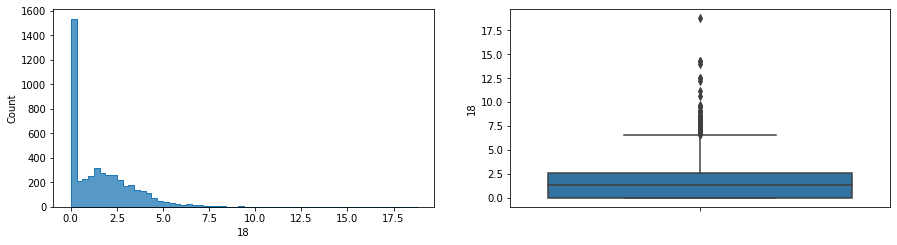

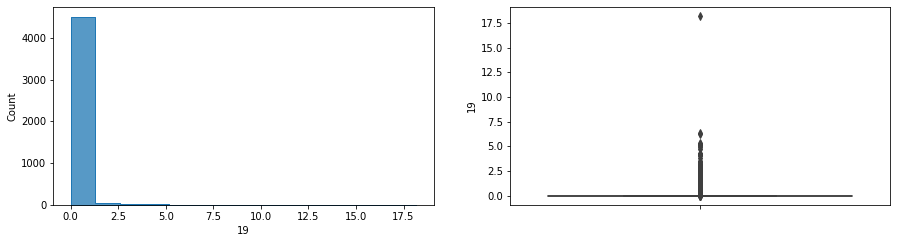

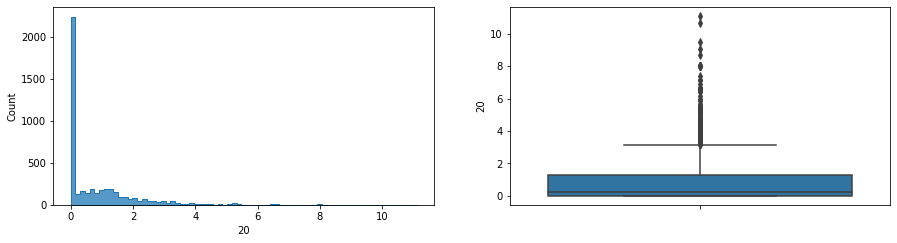

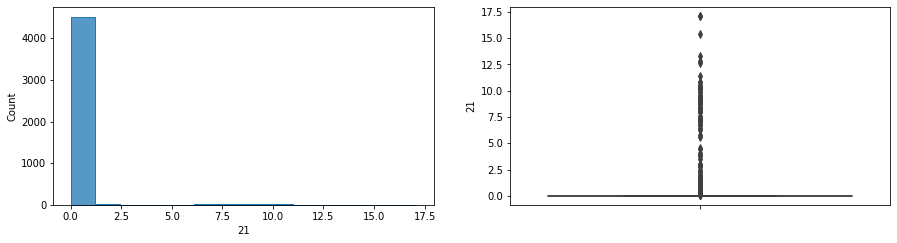

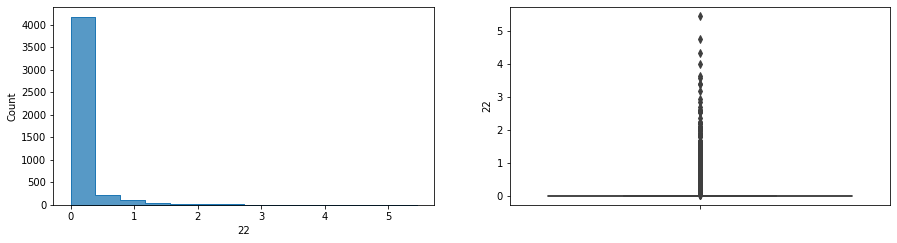

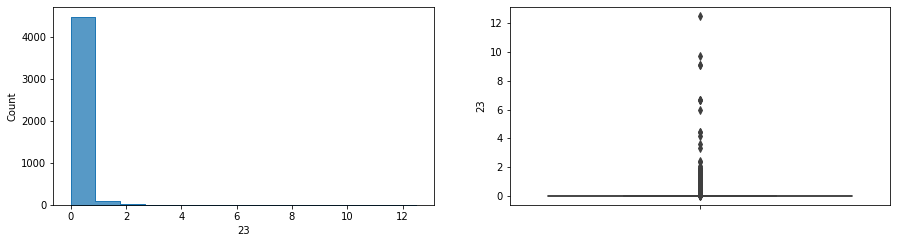

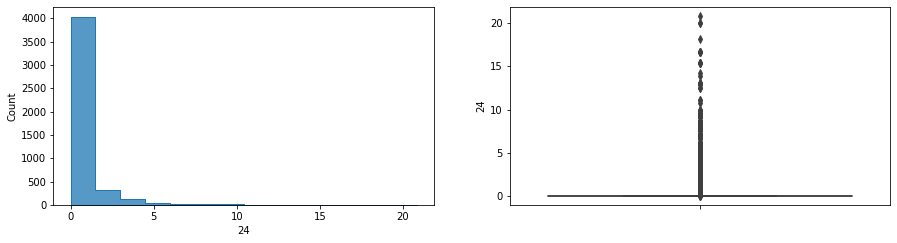

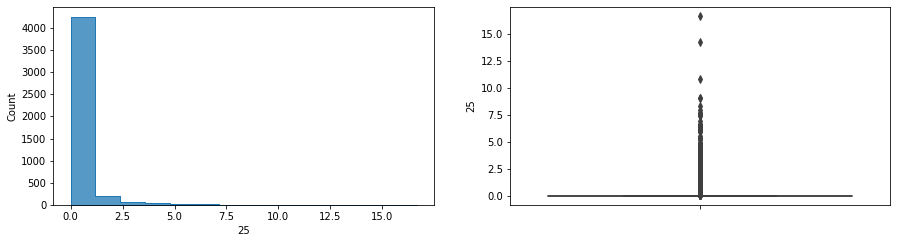

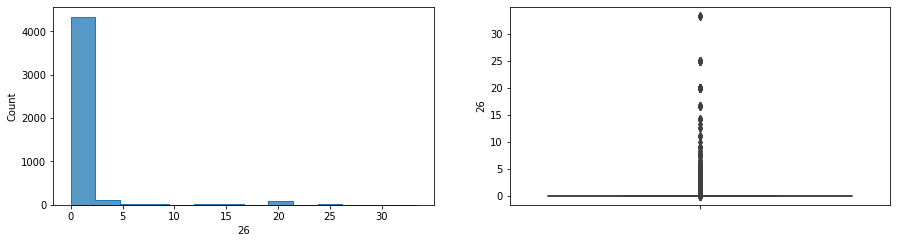

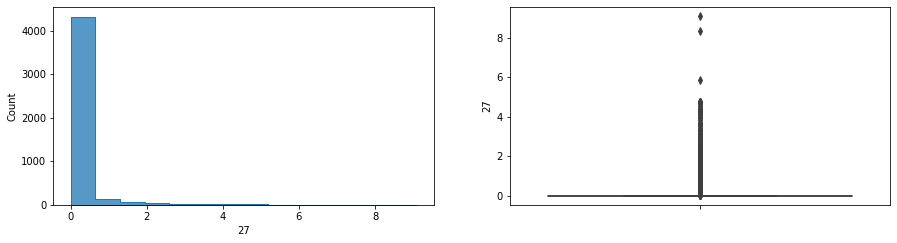

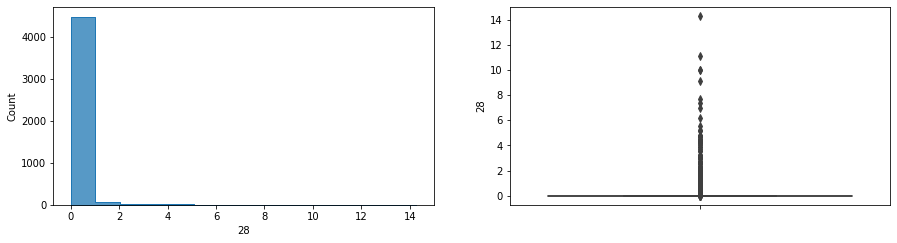

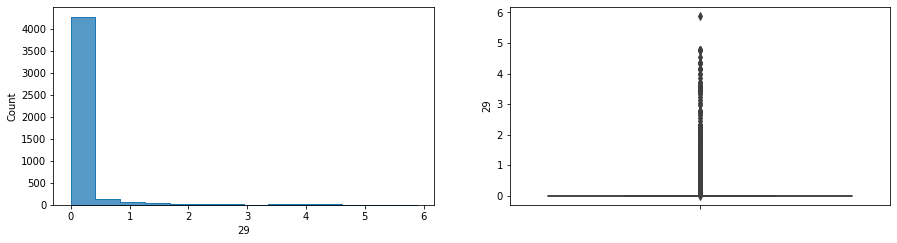

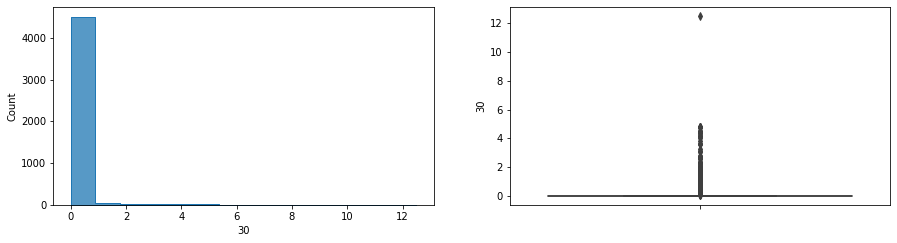

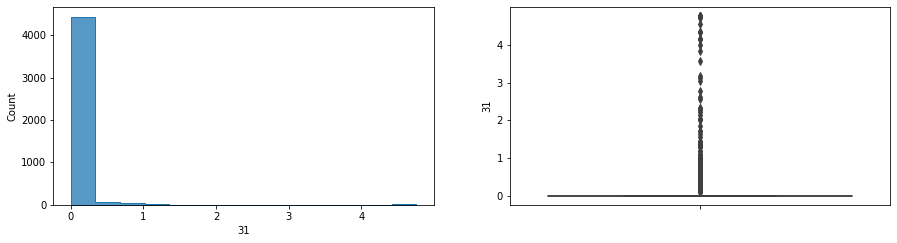

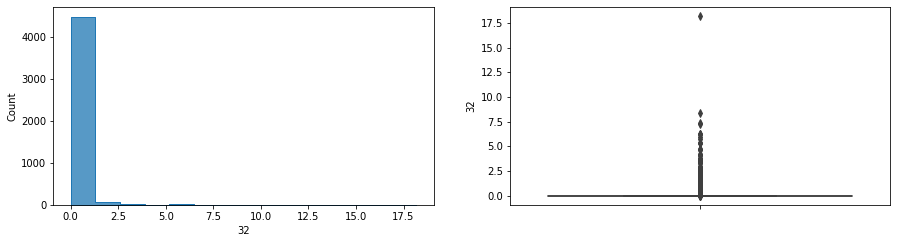

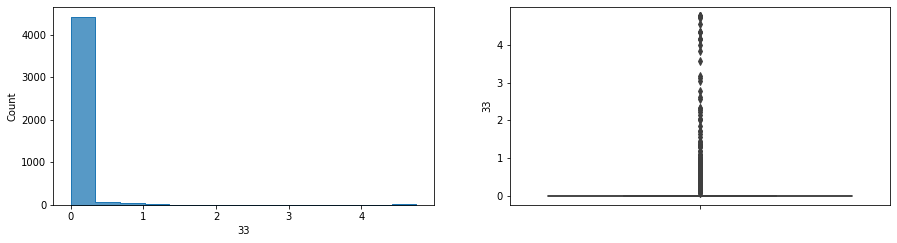

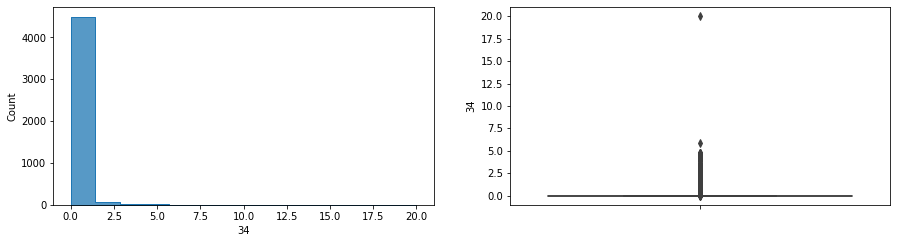

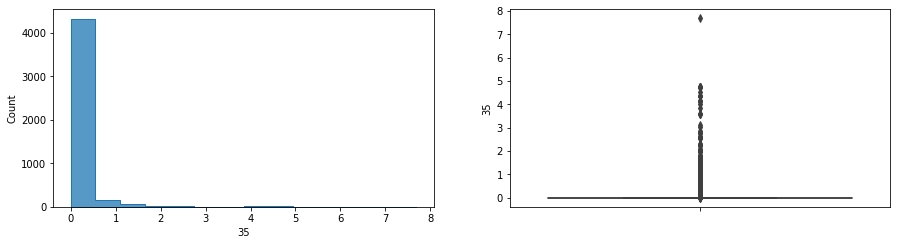

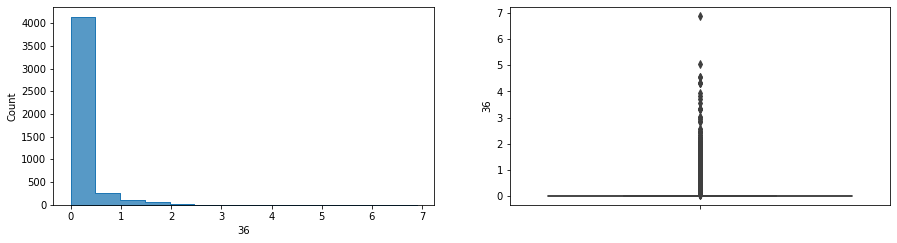

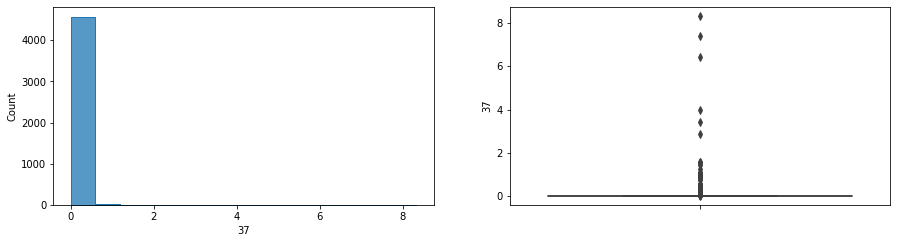

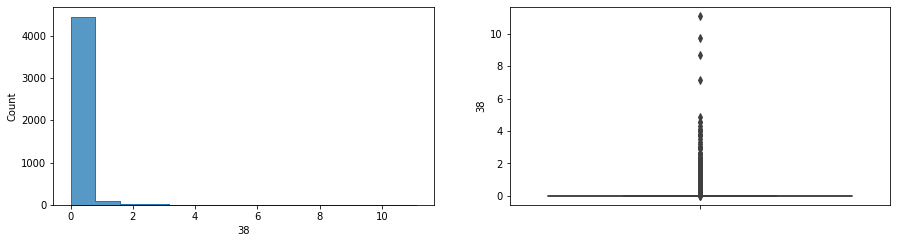

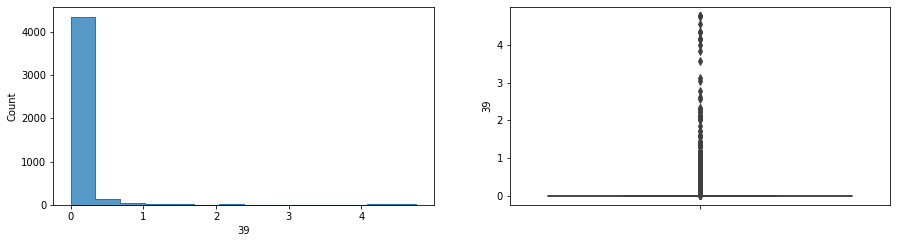

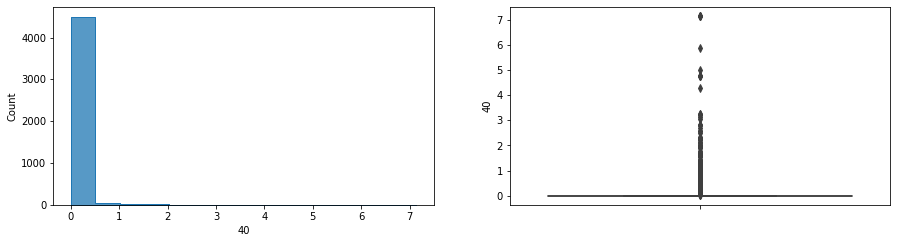

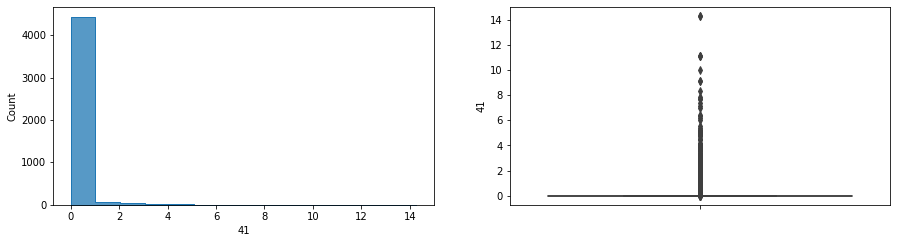

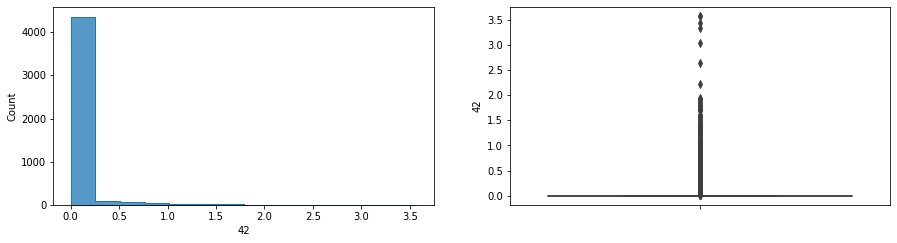

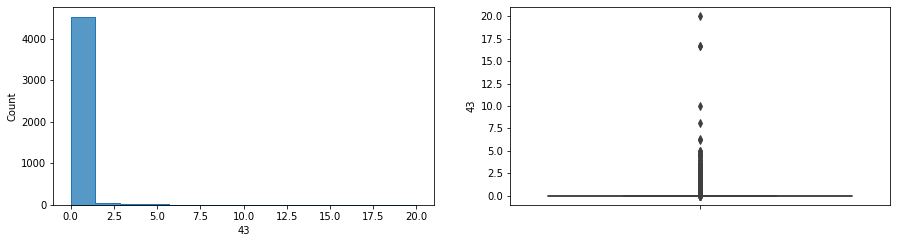

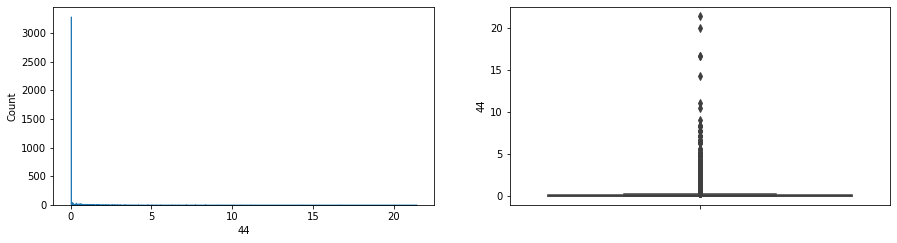

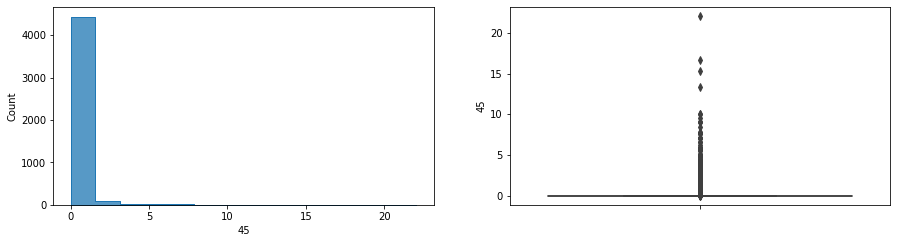

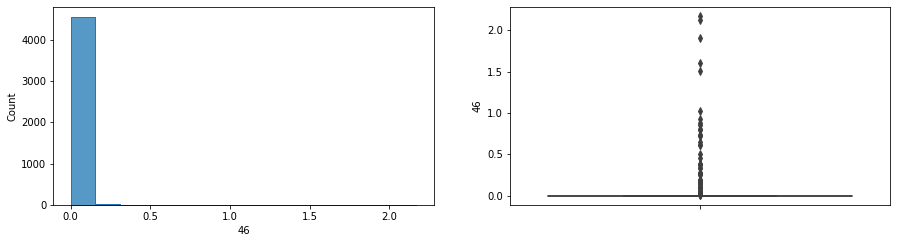

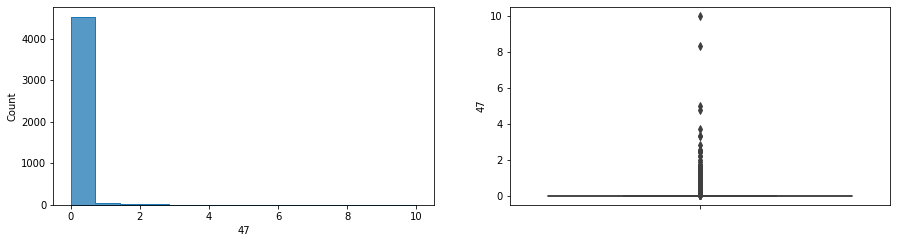

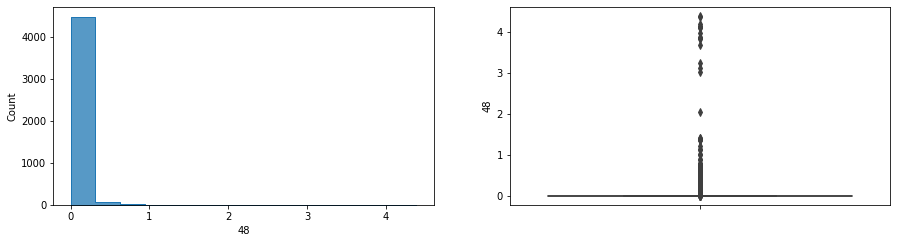

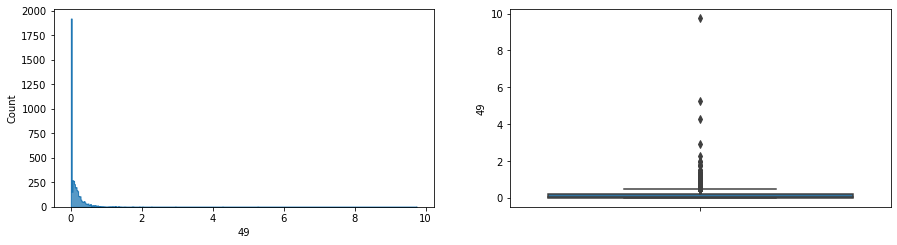

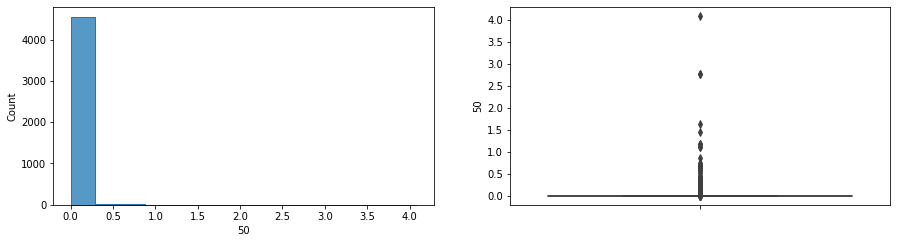

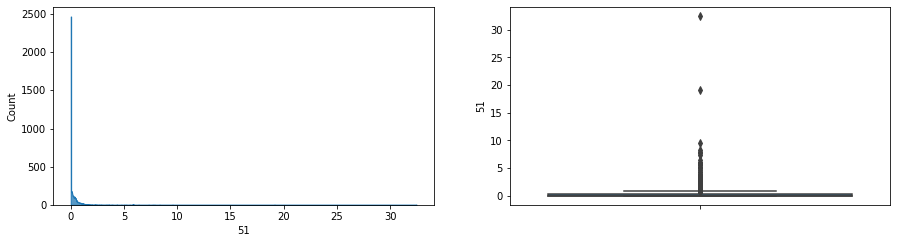

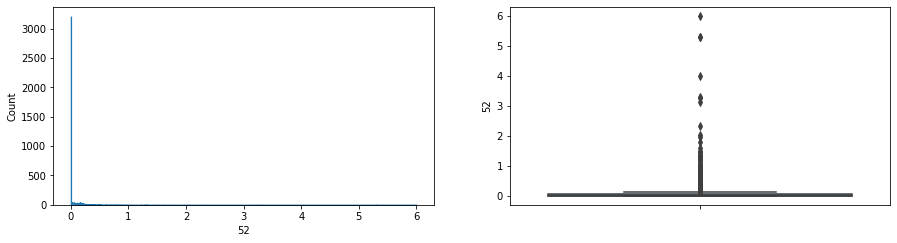

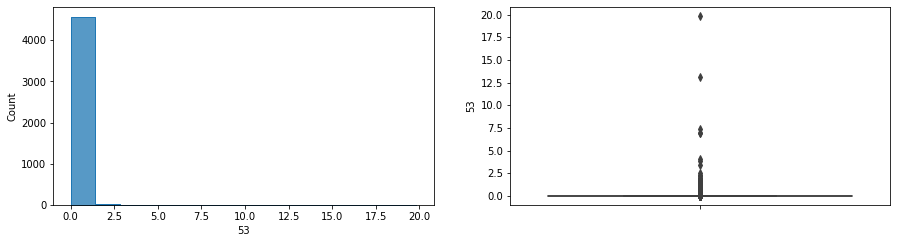

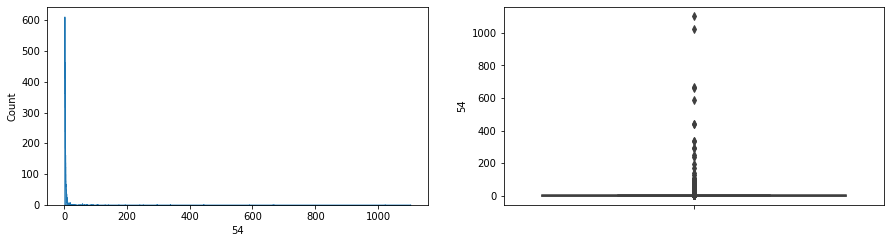

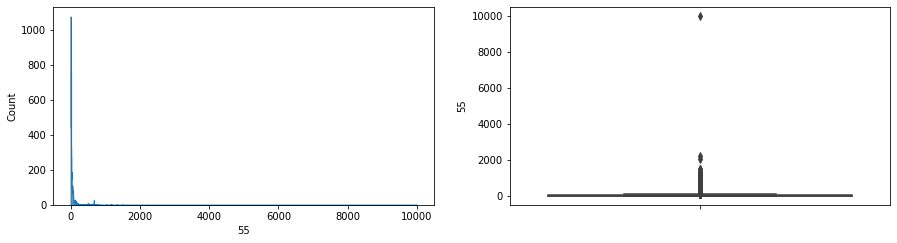

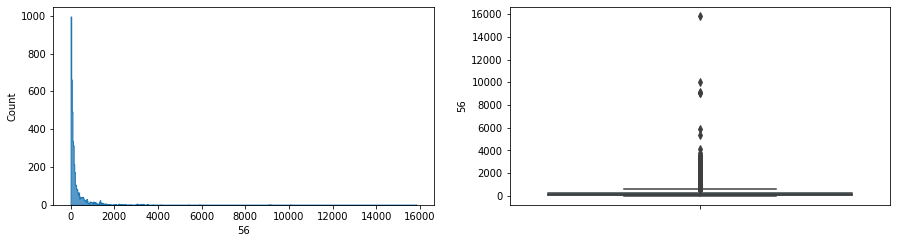

In [ ]:
# Afficher l'histogramme et le boxplot de chaque variable
for col in data.columns[:-1]:
    plt.figure(figsize=(15, 8))
    plt.subplot(221)
    sns.histplot(data=data, x=col, element="step")
    plt.subplot(222)
    sns.boxplot(data=data, y=col, orient="v")
    plt.show()

On voit que les variables ont beaucoup de valeurs aberrantes

### 3.2.Analyse statistique bivariées

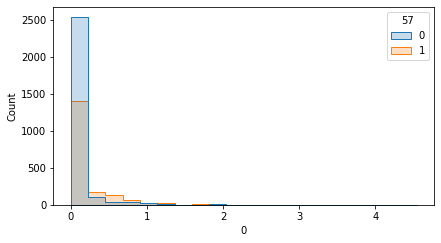

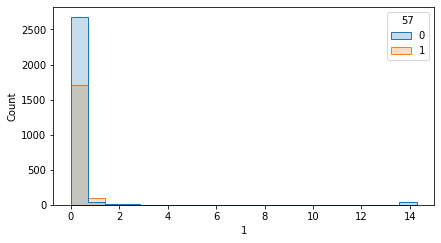

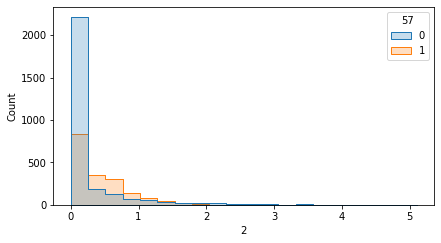

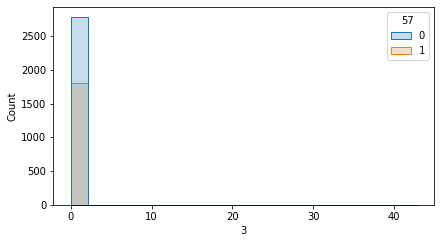

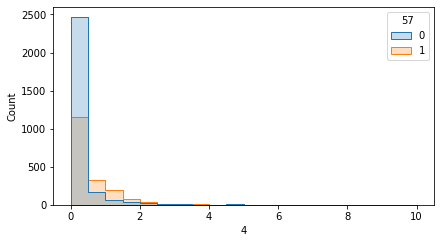

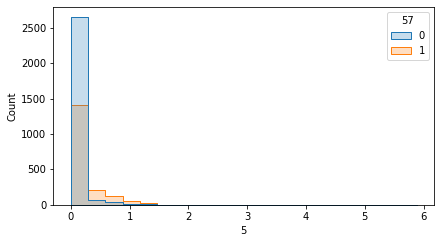

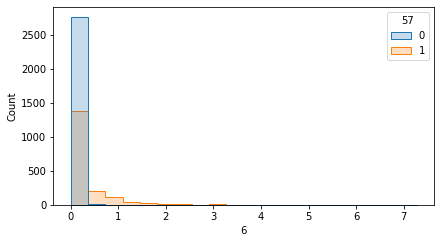

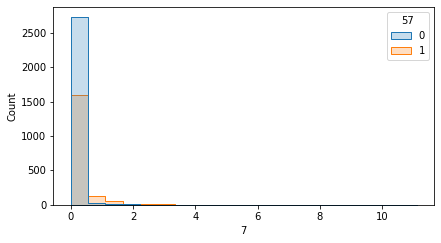

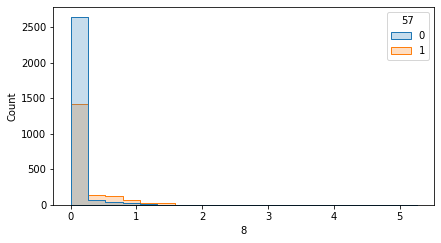

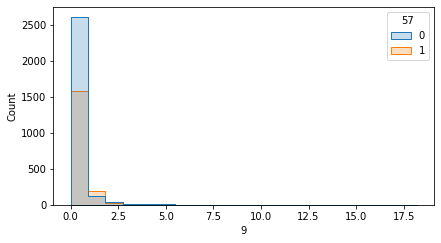

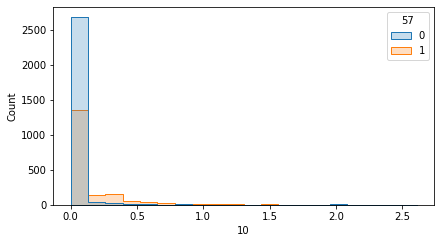

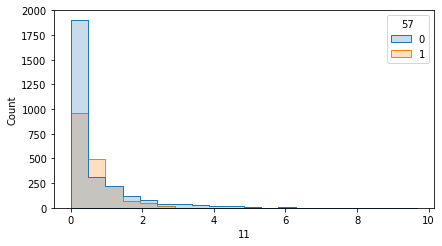

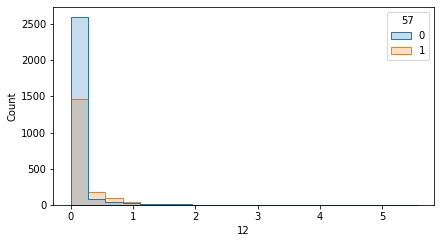

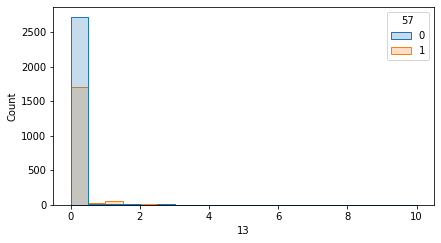

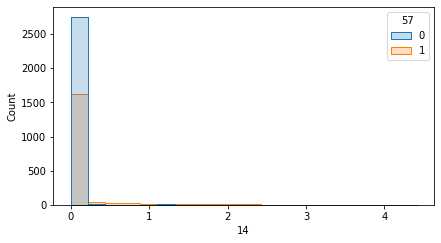

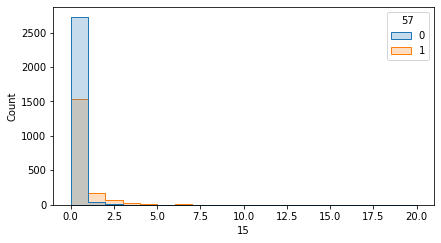

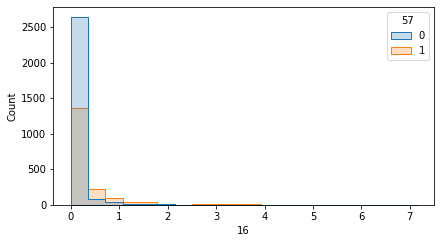

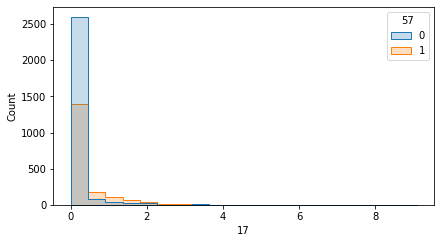

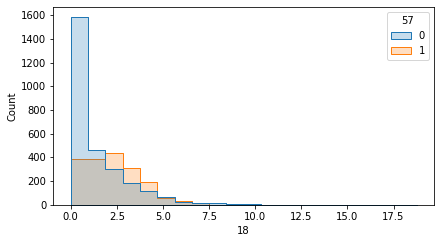

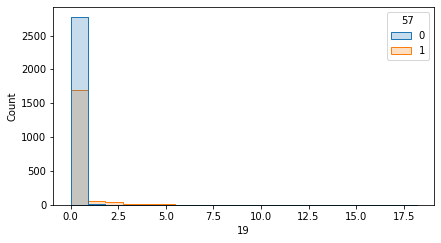

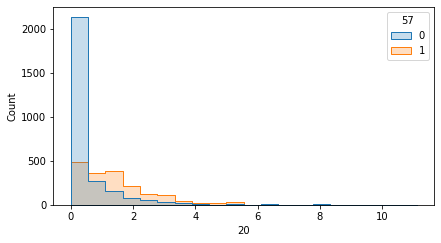

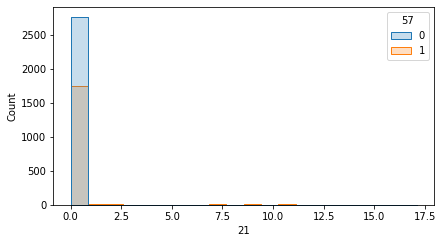

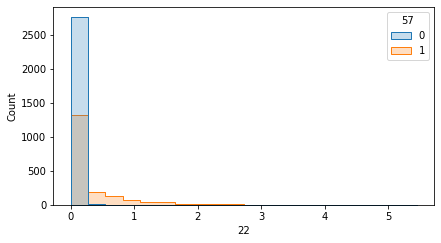

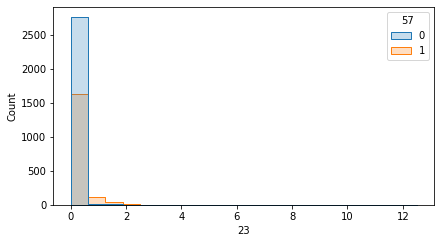

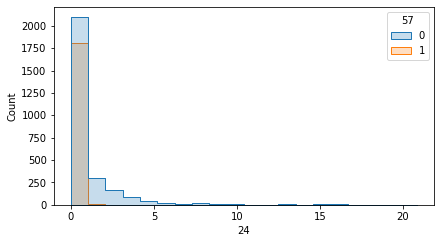

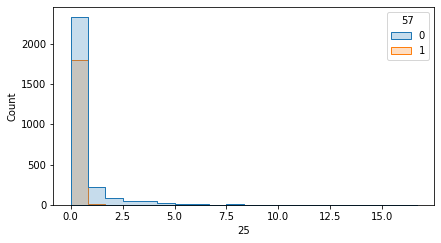

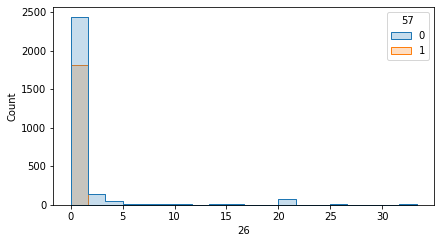

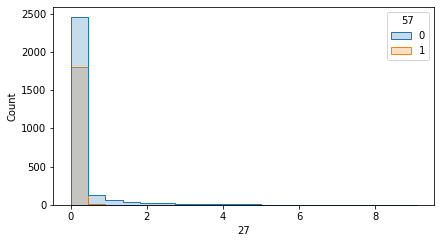

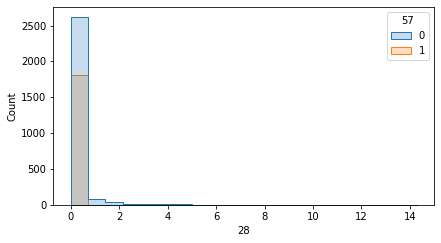

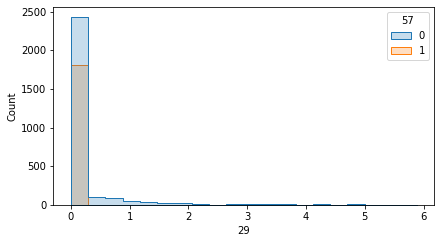

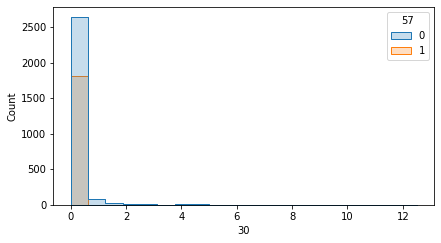

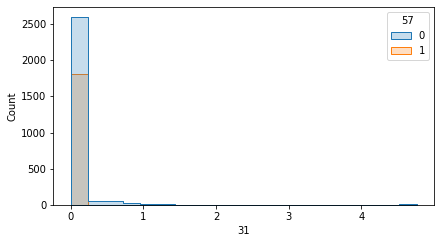

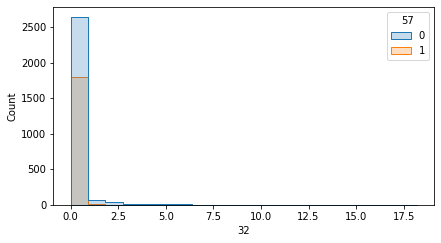

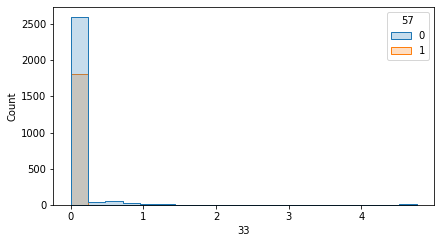

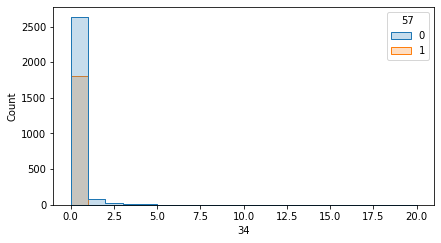

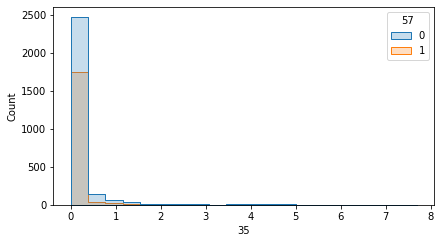

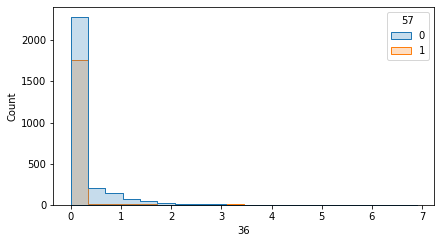

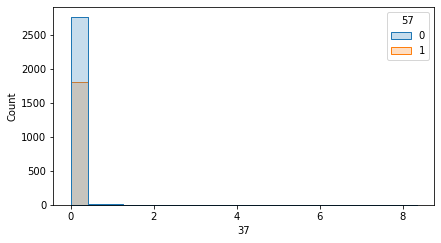

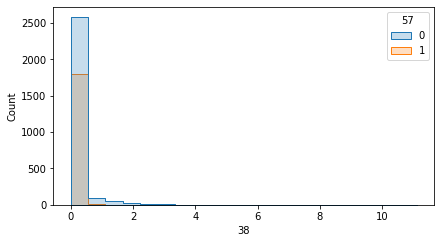

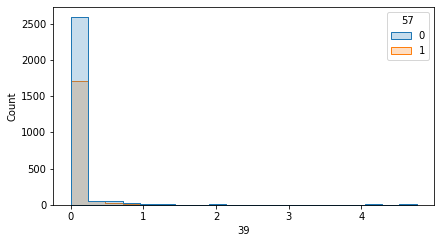

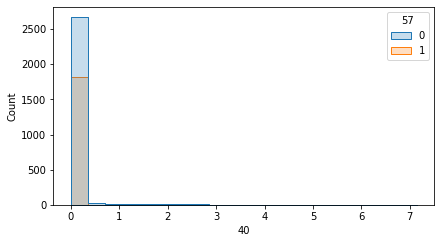

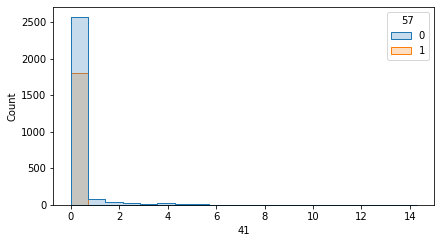

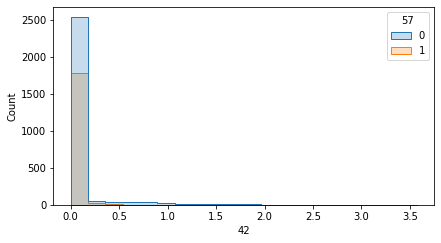

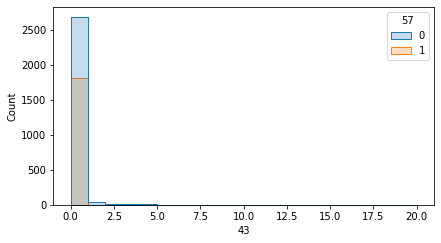

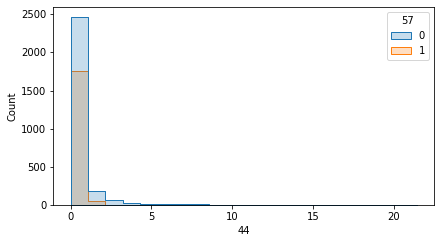

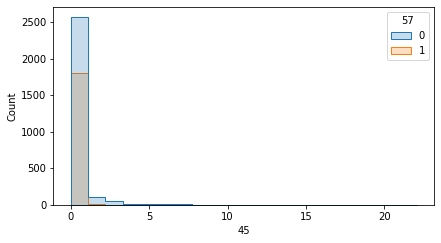

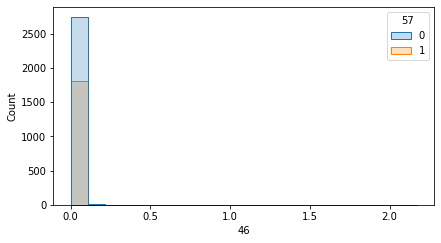

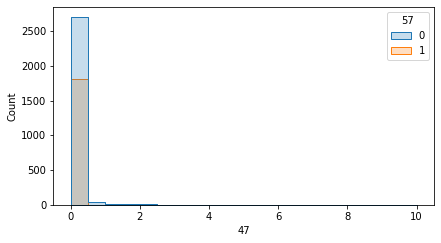

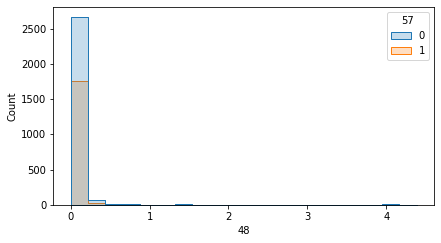

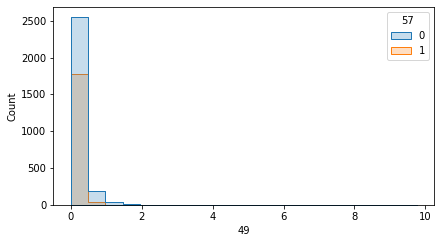

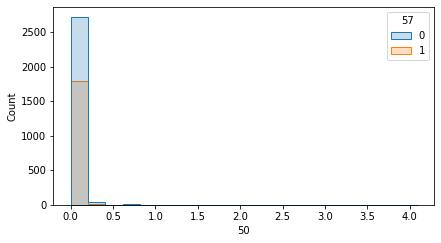

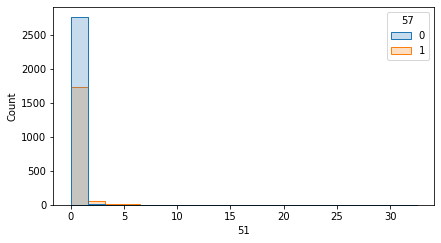

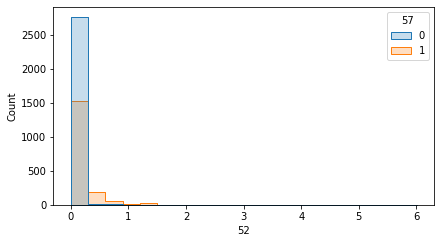

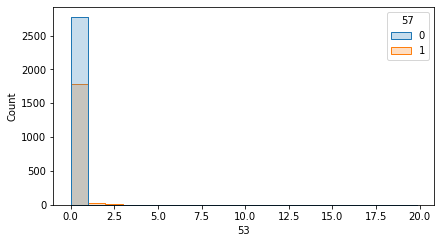

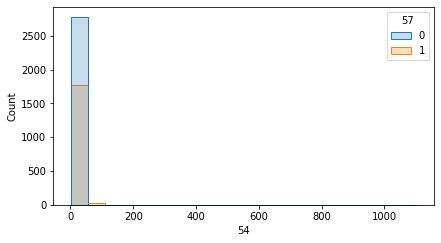

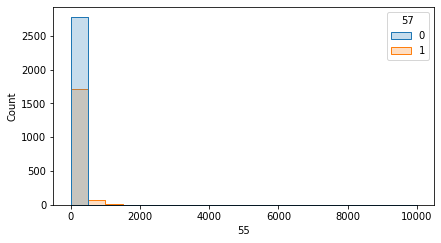

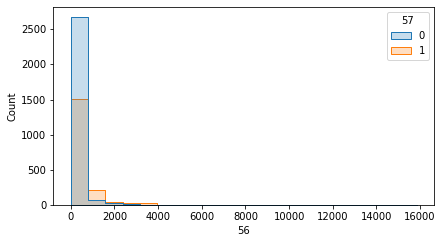

In [ ]:
# Afficher l'histogramme chaque variable par classe
for col in data.columns[:-1]:
    plt.figure(figsize=(15, 8))
    plt.subplot(221)
    sns.histplot(data=data, x=col, hue="57", element="step", bins=20)
    plt.show()

on remarque qu'aucune variable n'est discriminante

## 4.Prétraitement de données

### 4.1.Split train test

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Créer un trainset et un testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Afficher la taille du trainset
print("trainset :, ", X_train.shape)

# Afficher la taille du testset
print("testset :, ", X_test.shape)

trainset :,  (3680, 57)
testset :,  (921, 57)


### 4.2.Normalisation des données

In [ ]:
# Méthode de normalisation

class  NormalisationKhi2():
  def __init__(self,):
    self.racine_carree = None

  def fit(self, X):
    self.racine_carree = np.sqrt(np.asarray(X.sum(axis=1)).reshape((-1, 1)) * np.asarray(X.sum(axis=0)).reshape((1, -1)))

  def transform(self, X):
    if self.racine_carree is None:
      raise NotImplementedError()
    x = np.asarray(X) / self.racine_carree
    return pd.DataFrame(x, columns=X.columns, index=X.index)
  
  def fit_transform(self, X):
    if self.racine_carree is None:
      self.fit(X)
    return self.transform(X)

## 5.Construction de models

### 5.1.Méthode d'évaluation

In [ ]:
# procédure d'évaluation robuste, claire et informative
def evaluation(model, X_test):

  # Calculer les prédictions 
  ypred = model.predict(X_test)
  
  # Afficher le rapport (rappel, precision, ect...)
  print(classification_report(y_test, ypred))
  
  
  # calculer les preformance du model selon la quantité de donnée d'apprentissage
  N, train_score, val_score = learning_curve(model, X_train, y_train,
                                            cv=4, scoring='f1',
                                            train_sizes=np.linspace(0.1, 1, 10))
  
  # Afficher la courbe d'apprentissage
  plt.figure(figsize=(12, 8))
  plt.title("courbe d'apprentissage")
  plt.plot(N, train_score.mean(axis=1), label='train score')
  plt.plot(N, val_score.mean(axis=1), label='validation score')
  plt.legend()
  plt.show()
  
  # Afficher la matrice de confusion
  sns.heatmap(confusion_matrix(y_test, ypred), annot=True, fmt='d')
  plt.title("Matrice de confusion")
  plt.show()

### 5.2.Regression linéaire

#### 5.2.1.Sans faire la normalisation des données

In [ ]:
# Modifier la méthode "predict" du model afin qu'elle rends des valeurs catégorielles
class RegressionLineaire(LinearRegression):

  def __init__(self, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None):
    super().__init__(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)

  def predict(self, X):
    pred = LinearRegression.predict(self, X)
    pred[pred < 0.5] = 0
    pred[pred >= 0.5] = 1
    return pred


In [ ]:
# Créer le classifieur de regression linéaire 
lreg = RegressionLineaire()

# Diviser les données de test en 4 sous ensembles
cv = ShuffleSplit(4, test_size=0.2, random_state=0)

# Effectuer une crosse validation sur les données de train
scores = cross_val_score(lreg, X_train, y_train, cv=cv)

# Afficher le score de chaque fold
print("scores :", scores)

# Afficher la moyenne des scores
print("la moyenne des scores:", scores.mean(), "\n")

# ENtrainer le model sur l'ensemble des données d'apprentissage
lreg.fit(X_train, y_train)

scores : [0.470147   0.5376176  0.50668341 0.56905677]
la moyenne des scores: 0.5208761966393707 



RegressionLineaire(copy_X=True, fit_intercept=True, n_jobs=None,
                   normalize=False)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       538
           1       0.91      0.79      0.84       383

    accuracy                           0.88       921
   macro avg       0.88      0.86      0.87       921
weighted avg       0.88      0.88      0.88       921



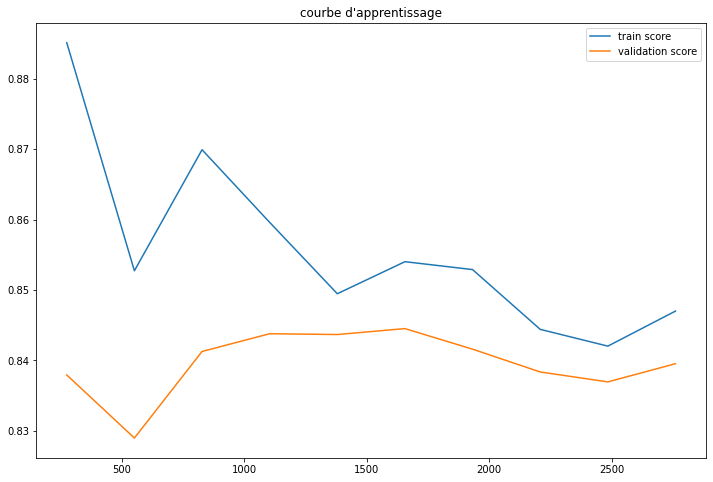

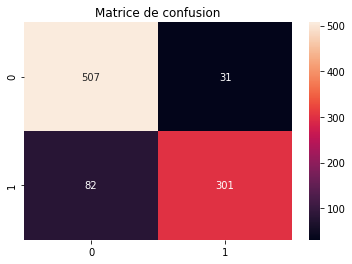

In [ ]:
# Evaluation du model de regression linéaire
evaluation(lreg, X_test=X_test)

#### 5.2.2.Avec la normalisation des données

In [ ]:
# Normalisation des données
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

normalisation = NormalisationKhi2()

X_normalized = normalisation.fit_transform(X)

# Créer un trainset et un testset
X_train_normalized, X_test_normalized, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=0)

# Afficher la taille du trainset
print("trainset :, ", X_train_normalized.shape)

# Afficher la taille du testset
print("testset :, ", X_test_normalized.shape)

trainset :,  (3680, 57)
testset :,  (921, 57)


In [ ]:
# Créer le classifieur de regression linéaire 
lreg = RegressionLineaire()

# Diviser les données de test en 4 sous ensembles
cv = ShuffleSplit(4, test_size=0.2, random_state=0)


# Effectuer une crosse validation sur les données de train
scores = cross_val_score(lreg, X_train_normalized, y_train, cv=cv)

# Afficher le score de chaque fold
print("scores :", scores)

# Afficher la moyenne des scores
print("la moyenne des scores:", scores.mean(), "\n")

# ENtrainer le model sur l'ensemble des données d'apprentissage
lreg.fit(X_train_normalized, y_train)

scores : [0.3789895  0.42484141 0.40461791 0.47833188]
la moyenne des scores: 0.4216951738998297 



RegressionLineaire(copy_X=True, fit_intercept=True, n_jobs=None,
                   normalize=False)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       538
           1       0.87      0.76      0.81       383

    accuracy                           0.85       921
   macro avg       0.86      0.84      0.84       921
weighted avg       0.85      0.85      0.85       921



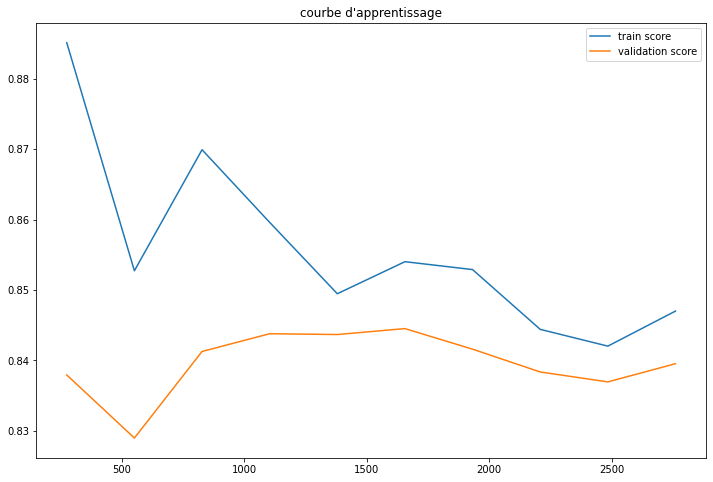

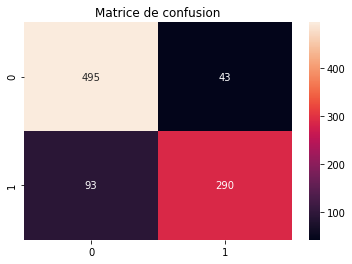

In [ ]:
# Evaluation du model de regression linéaire

evaluation(lreg, X_test=X_test_normalized)

### 5.3.KNN

#### 5.3.1.Sans normalisation

In [ ]:
# Créer le classifieur knn
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

# Diviser les données de test en 4 sous ensembles
cv = ShuffleSplit(4, test_size=0.2, random_state=0)

# Effectuer une crosse validation sur les données de train
scores = cross_val_score(knn, X_train, y_train, cv=cv)

print("scores :", scores)
print("la moyenne des scores:", scores.mean(), "\n")

knn.fit(X_train, y_train)

scores : [0.79076087 0.80434783 0.78668478 0.79211957]
la moyenne des scores: 0.7934782608695652 



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       538
           1       0.77      0.73      0.75       383

    accuracy                           0.80       921
   macro avg       0.79      0.79      0.79       921
weighted avg       0.80      0.80      0.80       921



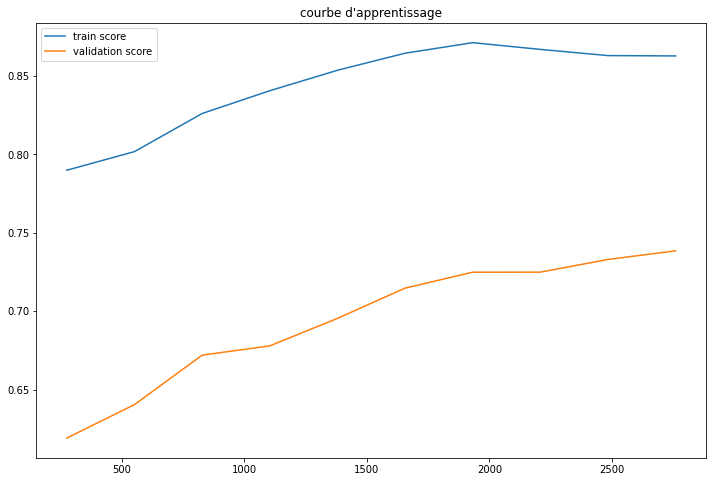

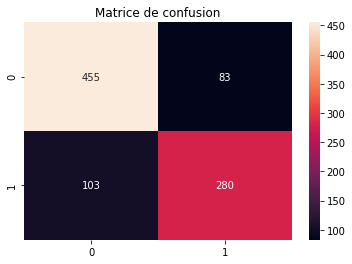

In [ ]:
# Evaluation du model KNN
evaluation(knn, X_test=X_test)

### Estimation du nombre de voisin k

In [ ]:
parameters = {"n_neighbors": range(30)}

clf = GridSearchCV(KNeighborsClassifier(), parameters)

clf.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected n_neighbors > 0. Got 0

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected n_neighbors > 0. Got 0

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected n_neighbors > 0. Got 0

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for 

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(0, 30)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [ ]:
# le meileurs k
clf.best_params_

{'n_neighbors': 1}

#### 5.3.2.Avec normalisation

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       538
           1       0.78      0.74      0.76       383

    accuracy                           0.80       921
   macro avg       0.80      0.79      0.80       921
weighted avg       0.80      0.80      0.80       921



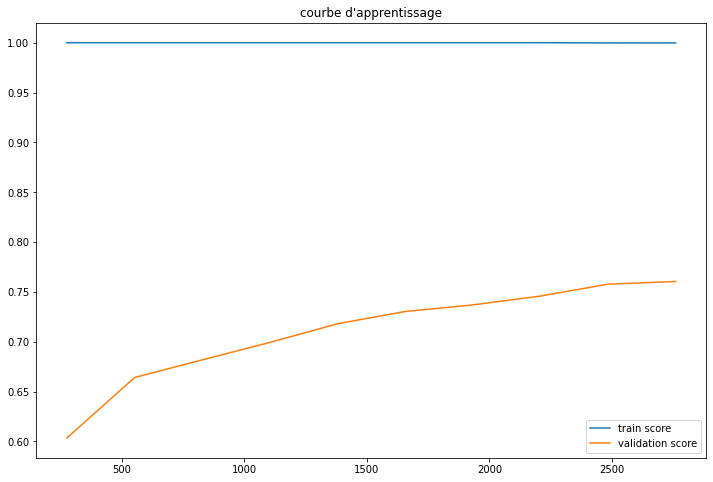

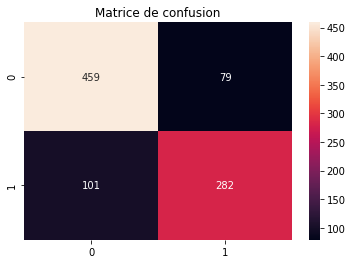

In [ ]:
evaluation(clf.best_estimator_, X_test=X_test)

In [ ]:
# Créer le classifieur knn
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

# Diviser les données de test en 4 sous ensembles
cv = ShuffleSplit(4, test_size=0.2, random_state=0)

# Effectuer une crosse validation sur les données de train
scores = cross_val_score(knn, X_train_normalized, y_train, cv=cv)

print("scores :", scores)
print("la moyenne des scores:", scores.mean(), "\n")

knn.fit(X_train_normalized, y_train)

scores : [0.90217391 0.90353261 0.89538043 0.9048913 ]
la moyenne des scores: 0.9014945652173914 



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       538
           1       0.89      0.89      0.89       383

    accuracy                           0.91       921
   macro avg       0.90      0.90      0.90       921
weighted avg       0.91      0.91      0.91       921



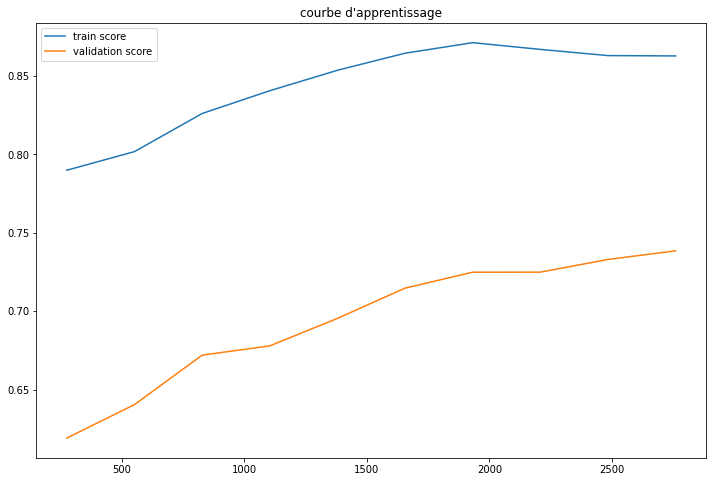

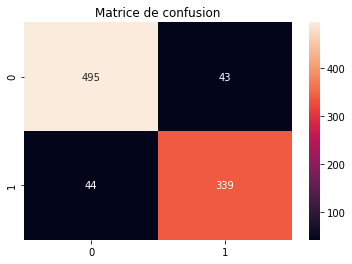

In [ ]:
# Evaluation du model KNN
evaluation(knn, X_test=X_test_normalized)

### Estimation du nombre de voisin k

In [ ]:
parameters = {"n_neighbors": range(30)}

clf = GridSearchCV(KNeighborsClassifier(), parameters)

clf.fit(X_train_normalized, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected n_neighbors > 0. Got 0

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected n_neighbors > 0. Got 0

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected n_neighbors > 0. Got 0

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for 

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(0, 30)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [ ]:
# le meileurs k
clf.best_params_

{'n_neighbors': 7}

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       538
           1       0.89      0.87      0.88       383

    accuracy                           0.90       921
   macro avg       0.90      0.90      0.90       921
weighted avg       0.90      0.90      0.90       921



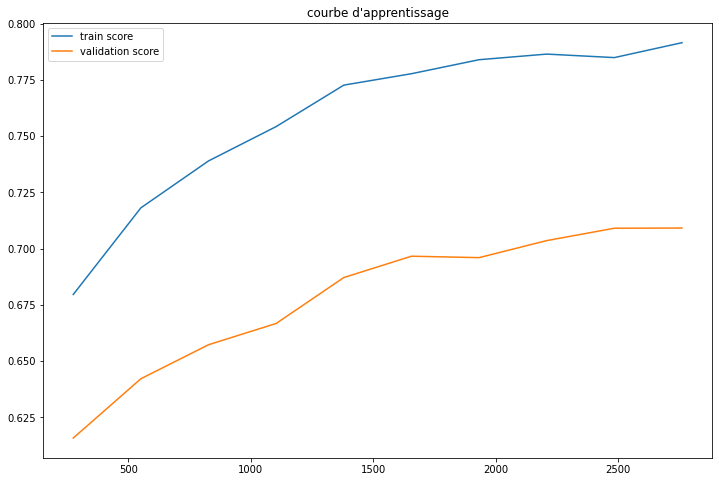

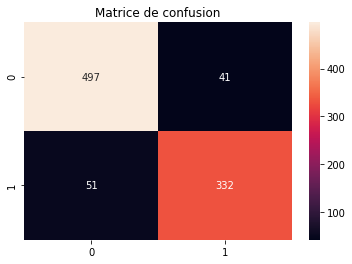

In [ ]:
evaluation(clf.best_estimator_, X_test=X_test_normalized)

### 5.4.Classifieur bayésien naïf 

#### 5.4.1.Sans normalisation

In [ ]:
# Créer le classifieur bayesien
naif_bayes = MultinomialNB()

# Diviser les données de test en 4 sous ensembles
cv = ShuffleSplit(4, test_size=0.2, random_state=0)

# Effectuer une crosse validation sur les données de train
scores = cross_val_score(naif_bayes, X_train, y_train, cv=cv)

print("scores :", scores)
print("la moyenne des scores:", scores.mean(), "\n")

naif_bayes.fit(X_train, y_train)

scores : [0.79347826 0.81793478 0.77853261 0.79483696]
la moyenne des scores: 0.7961956521739131 



MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       538
           1       0.78      0.77      0.77       383

    accuracy                           0.81       921
   macro avg       0.81      0.81      0.81       921
weighted avg       0.81      0.81      0.81       921



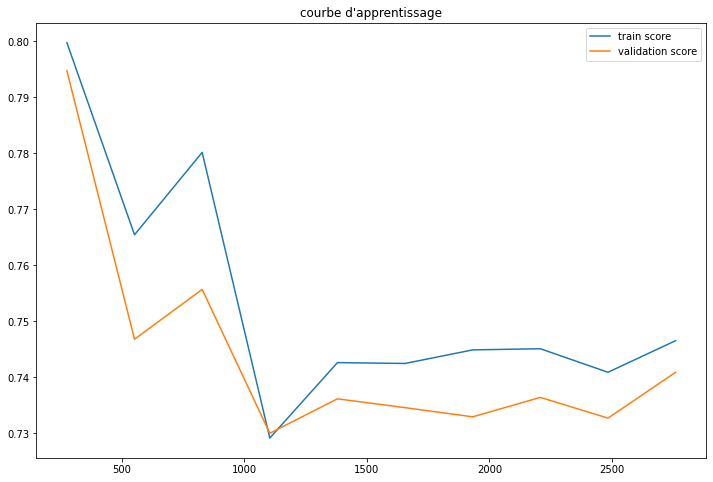

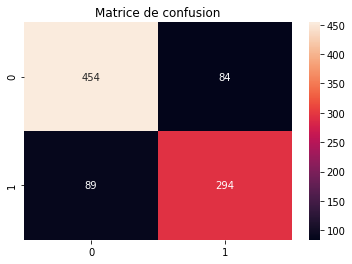

In [ ]:
# Evaluation du model bayesien
evaluation(naif_bayes, X_test=X_test)

#### 5.4.2.Avec normalisation

In [ ]:
# Créer le classifieur bayesien
naif_bayes = MultinomialNB()

# Diviser les données de test en 4 sous ensembles
cv = ShuffleSplit(4, test_size=0.2, random_state=0)

# Effectuer une crosse validation sur les données de train
scores = cross_val_score(naif_bayes, X_train_normalized, y_train, cv=cv)

print("scores :", scores)
print("la moyenne des scores:", scores.mean(), "\n")

naif_bayes.fit(X_train_normalized, y_train)

scores : [0.60733696 0.5951087  0.60190217 0.60190217]
la moyenne des scores: 0.6015625 



MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

              precision    recall  f1-score   support

           0       0.58      1.00      0.74       538
           1       0.00      0.00      0.00       383

    accuracy                           0.58       921
   macro avg       0.29      0.50      0.37       921
weighted avg       0.34      0.58      0.43       921



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


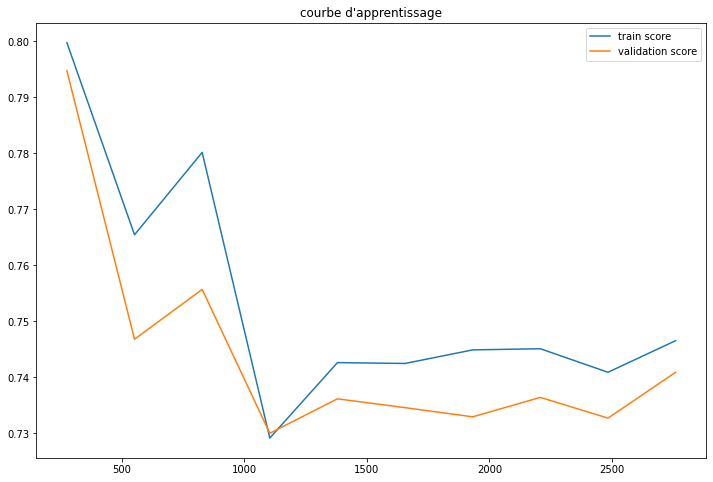

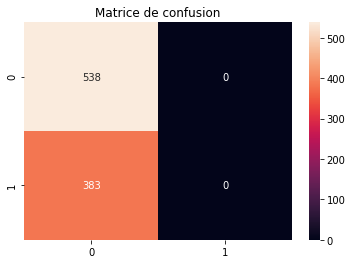

In [ ]:
# Evaluation du model bayesien
evaluation(naif_bayes, X_test=X_test_normalized)

### 6.Conclusion:

sans normalisation: le modèle de régression linéaire donne le meilleur résultat, soit une précision de 80%

avec normalisation: le modèle knn donne de meilleurs résultats avec une précision de 91%